# Gray world, histogram alignment

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$rw = \frac{\overline{R}}{Avg}$,
$gw = \frac{\overline{G}}{Avg}$,
$bw = \frac{\overline{B}}{Avg}$, где $Avg = \frac{\overline{R} + \overline{G} + \overline{B}}{3}$.

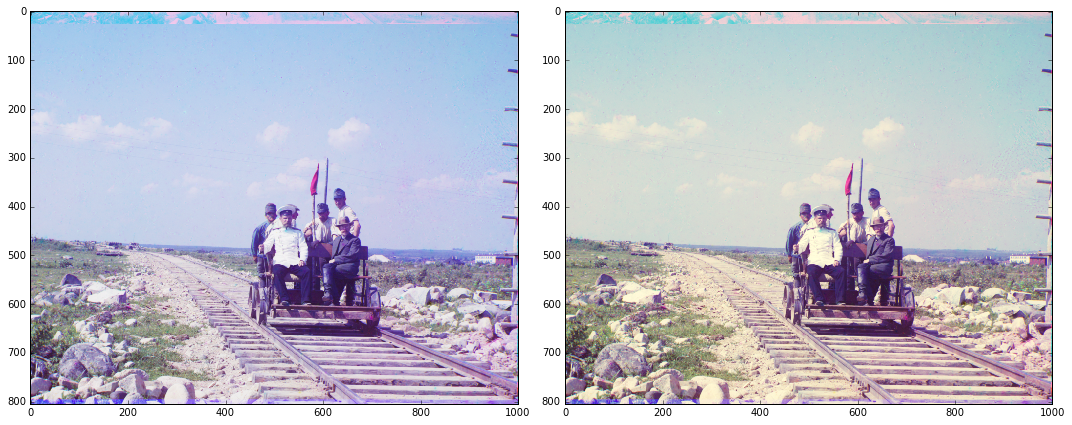

In [153]:
i1 = imread('img_1.png')
i1 = img_as_float(i1)
R = i1[:, :, 0]
G = i1[:, :, 1]
B = i1[:, :, 2]
Ra = sum(R.ravel()) / len(R.ravel())
Ga = sum(G.ravel()) / len(G.ravel())
Ba = sum(B.ravel()) / len(B.ravel())
avg = (Ra + Ga + Ba) / 3
rw = Ra / avg
gw = Ga / avg
bw = Ba / avg
R = R / rw
G = G / gw
B = B / bw
i1_2 = np.dstack((R, G, B))
i1_2 = np.clip(i1_2, 0, 1)
#i1_2 = i1_2.astype('uint8')
i1_2 = img_as_ubyte(i1_2)
plt.figure(figsize = (15, 15))
plt.subplot(121)
imshow(i1)
plt.subplot(122)
imshow(i1_2)

$f(x) = \frac{cdf(x) - cdf_{min}}{Num_{pxl} - 1} \times 255 $,
где $cdf$ - функция распределения, $Num_{pxl}$ - количество пикселей, $cdf_{min}$ - минимальное значение $cdf$ не равное 0. 

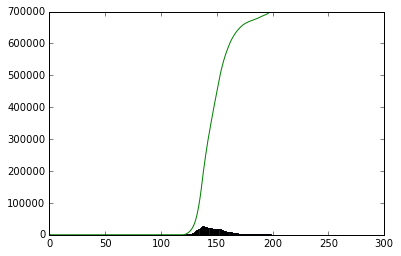

In [147]:
i2 = imread('img_2.png')
i2_2 = imread('img_2.png')
h = plt.hist(i2.ravel(), bins = 256, range = [0, 255])
cdf = np.cumsum(h[0])
plt.plot(cdf)
pix = i2.shape[0] * i2.shape[1]
m = min(i for i in cdf if i > 0)
for i in range(0,i2.shape[0]):
    for j in range(0,i2.shape[1]):
        #p = i2[i][j]
        i2[i][j] = ((cdf[i2[i][j]] - m) / (pix - 1)) * 255


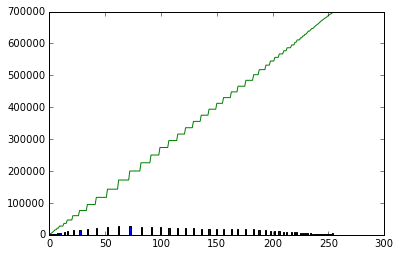

In [148]:
h = plt.hist(i2.ravel(), bins = 256, range = [0, 255])
cdf = np.cumsum(h[0])
plt.plot(cdf)

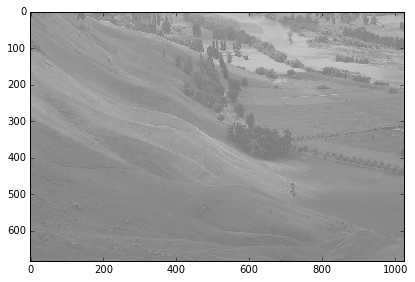

In [149]:
imshow(i2_2)

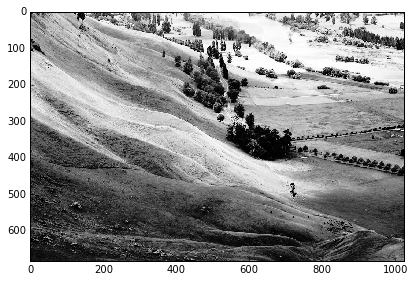

In [150]:
imshow(i2)